<a href="https://colab.research.google.com/github/jadercaro/Prediccion-colesterol/blob/main/0_Analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Choresterol**

El conjunto de datos de enfermedades cardíacas es una colección que aborda el diagnóstico de enfermedades cardíacas mediante el análisis de varios atributos médicos. Recopilado de cuatro instituciones médicas distintas, este conjunto de datos contiene información de pacientes de diversas ubicaciones, incluidos Cleveland, Budapest, Long Beach (California) y Zurich (Suiza). Con un total de 76 atributos, se ha utilizado una selección de 14 de ellos en investigaciones anteriores. El objetivo principal de estas investigaciones ha sido predecir la el colesterol sérico en mg/dl. Es importante destacar que, aunque se han realizado estudios previos con este conjunto de datos, la mayoría de ellos se han centrado en la base de datos de Cleveland.

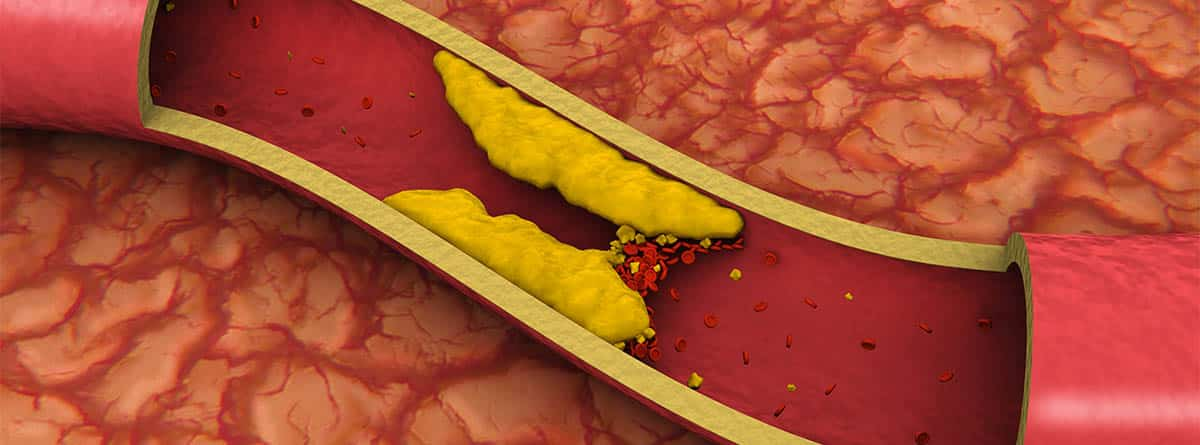


### **Descripción de las variables del conjunto de datos:**

| Atributo   | Descripción                                                                                   |
|------------|-----------------------------------------------------------------------------------------------|
| **Age**        | Edad del paciente en años.                                                                   |
| **Sex**        | Sexo del paciente. 1 = masculino, 0 = femenino.                                             |
| **CP**         | Tipo de dolor en el pecho.                                                                   |
|            | - Valor 1: Angina típica.                                                                    |
|            | - Valor 2: Angina atípica.                                                                   |
|            | - Valor 3: Dolor no anginal.                                                                 |
|            | - Valor 4: Asintomático.                                                                     |
| **Trestbps**   | Presión arterial en reposo en mm Hg al ingreso al hospital.                                  |
| **Chol**       | Colesterol sérico en mg/dl.                                                                  |
| **FBS**        | Nivel de azúcar en sangre en ayunas. 1 = verdadero, 0 = falso.                               |
| **Restecg**    | Resultados electrocardiográficos en reposo.                                                  |
|            | - Valor 0: Normal.                                                                           |
|            | - Valor 1: Con anormalidad en la onda ST-T.                                                 |
|            | - Valor 2: Probable o definitiva hipertrofia ventricular izquierda.                          |
| **Thalach**    | Frecuencia cardíaca máxima alcanzada.                                                        |
| **Exang**      | Angina inducida por ejercicio. 1 = sí, 0 = no.                                               |
| **Oldpeak**    | Depresión del segmento ST inducida por el ejercicio relativa al reposo.                       |
| **Slope**      | La pendiente del segmento ST durante el ejercicio.                                            |
|            | - Valor 1: Ascendente.                                                                       |
|            | - Valor 2: Plano.                                                                            |
|            | - Valor 3: Descendente.                                                                     |
| **CA**         | Número de vasos principales (0-3) coloreados por fluoroscopía.                                |
| **Thal**       | Resultados de la prueba de thalium.                                                          |
|            | - Valor 3: Normal.                                                                           |
|            | - Valor 6: Defecto fijo.                                                                     |
|            | - Valor 7: Defecto reversible.                                                               |
| **Num**        | Diagnóstico de enfermedad cardíaca (estado angiográfico).                                     |
|            | - Valor 0: Menos del 50% de estrechamiento del diámetro en cualquier vaso importante.         |
|            | - Valor 1: Más del 50% de estrechamiento del diámetro en cualquier vaso importante.           |



------------

In [ ]:
!pip install dython

###**Librerias utilizadas**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.io import arff
import matplotlib.pyplot as plt
import warnings
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from dython.nominal import associations
warnings.filterwarnings('ignore')
!git clone https://github.com/javel3232/cholesterol.git
os.chdir('/content/cholesterol/Data')

Cloning into 'cholesterol'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 22 (delta 4), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (22/22), 1.05 MiB | 9.38 MiB/s, done.
Resolving deltas: 100% (4/4), done.


###**Carga de los Datos**

In [ ]:
data, meta = arff.loadarff('dataset_2190_cholesterol.arff')
df = pd.DataFrame(data)
df.head(10)

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63.0,b'1',b'1',145.0,b'1',b'2',150.0,b'0',2.3,b'3',0.0,b'6',0.0,233.0
1,67.0,b'1',b'4',160.0,b'0',b'2',108.0,b'1',1.5,b'2',3.0,b'3',2.0,286.0
2,67.0,b'1',b'4',120.0,b'0',b'2',129.0,b'1',2.6,b'2',2.0,b'7',1.0,229.0
3,37.0,b'1',b'3',130.0,b'0',b'0',187.0,b'0',3.5,b'3',0.0,b'3',0.0,250.0
4,41.0,b'0',b'2',130.0,b'0',b'2',172.0,b'0',1.4,b'1',0.0,b'3',0.0,204.0
5,56.0,b'1',b'2',120.0,b'0',b'0',178.0,b'0',0.8,b'1',0.0,b'3',0.0,236.0
6,62.0,b'0',b'4',140.0,b'0',b'2',160.0,b'0',3.6,b'3',2.0,b'3',3.0,268.0
7,57.0,b'0',b'4',120.0,b'0',b'0',163.0,b'1',0.6,b'1',0.0,b'3',0.0,354.0
8,63.0,b'1',b'4',130.0,b'0',b'2',147.0,b'0',1.4,b'2',1.0,b'7',2.0,254.0
9,53.0,b'1',b'4',140.0,b'1',b'2',155.0,b'1',3.1,b'3',0.0,b'7',1.0,203.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    float64
 4   fbs       303 non-null    object 
 5   restecg   303 non-null    object 
 6   thalach   303 non-null    float64
 7   exang     303 non-null    object 
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    object 
 10  ca        299 non-null    float64
 11  thal      303 non-null    object 
 12  num       303 non-null    float64
 13  chol      303 non-null    float64
dtypes: float64(7), object(7)
memory usage: 33.3+ KB


###**Eliminamos el valor de b que acompañaban a las variables categoricas discretas y las convertimos de tipo object a un tipo int para una mejor interpretacion de los datos**

In [ ]:

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
        df[col] = df[col].astype(str)

int_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in int_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')

df.head()


,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63.0,1,1,145.0,1,2,150.0,0,2.3,3,0.0,6.0,0.0,233.0
1,67.0,1,4,160.0,0,2,108.0,1,1.5,2,3.0,3.0,2.0,286.0
2,67.0,1,4,120.0,0,2,129.0,1,2.6,2,2.0,7.0,1.0,229.0
3,37.0,1,3,130.0,0,0,187.0,0,3.5,3,0.0,3.0,0.0,250.0
4,41.0,0,2,130.0,0,2,172.0,0,1.4,1,0.0,3.0,0.0,204.0


###**Información de los datos Modificados**

In [ ]:
df.info()
display(df.describe())
print(f"Cantidad de filas en el archivo de entrenamiento:\t{df.shape[0]}")
print(f"Cantidad de columnas en el archivo de entrenamiento:\t{df.shape[1]}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int8   
 2   cp        303 non-null    int8   
 3   trestbps  303 non-null    float64
 4   fbs       303 non-null    int8   
 5   restecg   303 non-null    int8   
 6   thalach   303 non-null    float64
 7   exang     303 non-null    int8   
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int8   
 10  ca        299 non-null    float64
 11  thal      301 non-null    float64
 12  num       303 non-null    float64
 13  chol      303 non-null    float64
dtypes: float64(8), int8(6)
memory usage: 20.8 KB


,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294,246.693069
std,9.038662,0.467299,0.960126,17.599748,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536,51.776918
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,126.000000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,211.000000
50%,56.000000,1.000000,3.000000,130.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,241.000000
75%,61.000000,1.000000,4.000000,140.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,275.000000
max,77.000000,1.000000,4.000000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,564.000000


Cantidad de filas en el archivo de entrenamiento:	303
Cantidad de columnas en el archivo de entrenamiento:	14



###**Valores Faltantes**

In [ ]:
display(pd.DataFrame({'Variables': df.isna().sum().index, 'Valores faltantes': df.isna().sum().values}))

,Variables,Valores faltantes
0,age,0
1,sex,0
2,cp,0
3,trestbps,0
4,fbs,0
5,restecg,0
6,thalach,0
7,exang,0
8,oldpeak,0
9,slope,0


###**Imputación de valores faltantes en la columna "ca" y "thal" con la media**

In [ ]:
mean_ca = df['ca'].mean()
df['ca'].fillna(mean_ca, inplace=True)

mean_thal = df['thal'].mean()
df['thal'].fillna(mean_thal, inplace=True)
display(pd.DataFrame({'Variables': df.isna().sum().index, 'Valores faltantes': df.isna().sum().values}))

,Variables,Valores faltantes
0,age,0
1,sex,0
2,cp,0
3,trestbps,0
4,fbs,0
5,restecg,0
6,thalach,0
7,exang,0
8,oldpeak,0
9,slope,0


###**Matriz de dispersiones**

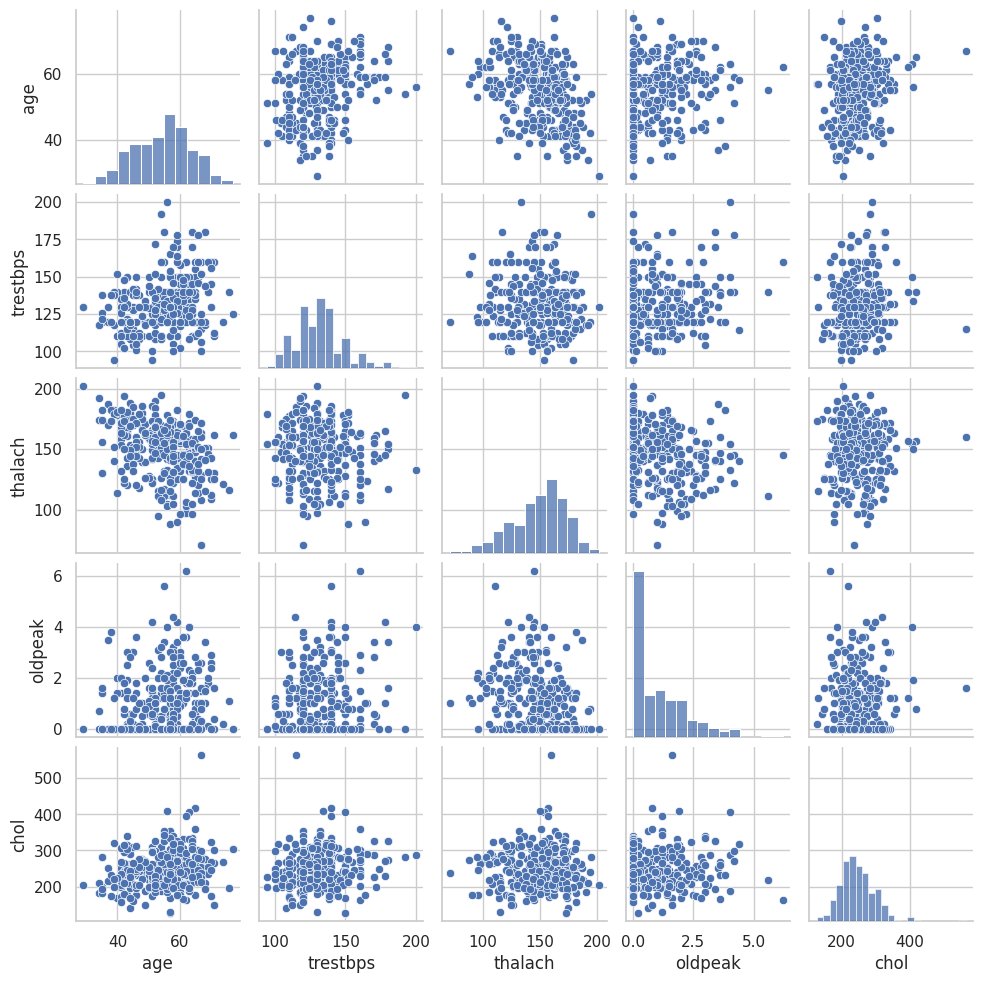

In [ ]:
sns.set(style='whitegrid', context='notebook')
cols=['age','trestbps','thalach','oldpeak','chol']
sns.pairplot(df[cols] , height=2, palette='viridis')
plt.show()

###**Distribución de las variables en el conjunto de datos**

![Skewness](https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png
)

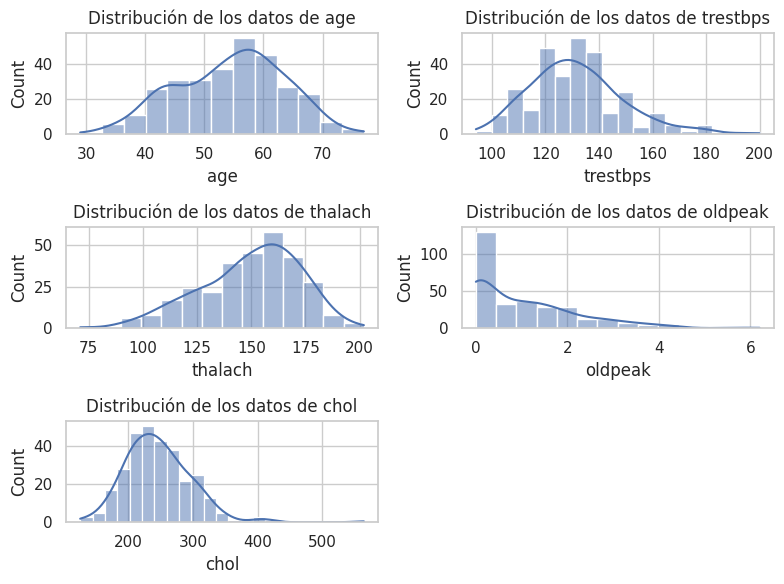

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Distribución de las variables en el conjunto de datos ")
for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    plt.title(f"Distribución de los datos de {col}")
    sns.histplot(df[col], kde=True)
    plt.tight_layout()
    plt.plot()
plt.show()


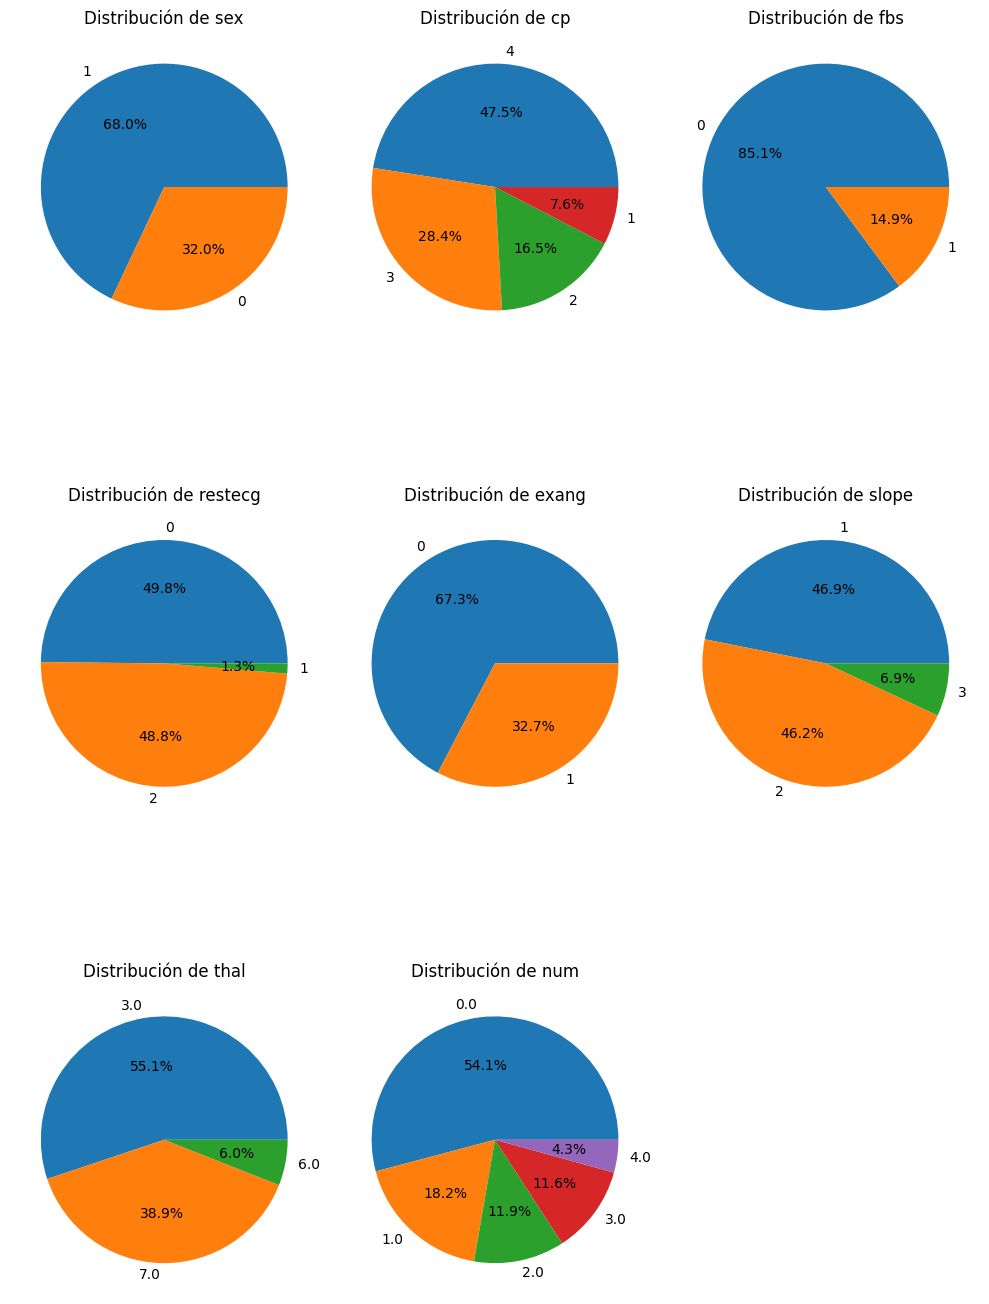

In [ ]:
def pie_chart_for_variables(df, variables):
    num_variables = len(variables)
    fig, axs = plt.subplots((num_variables + 2) // 3, 3, figsize=(10, 5 * ((num_variables + 2) // 3)))

    for i, var in enumerate(variables):
        counts = df[var].value_counts()
        ax = axs[i // 3, i % 3]
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
        ax.set_title(f'Distribución de {var}')

    if num_variables % 3 != 0:
        for j in range(num_variables % 3, 3):
            fig.delaxes(axs[num_variables // 3, j])

    plt.tight_layout()
    plt.show()
variables_cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']
pie_chart_for_variables(df, variables_cat)



###**Box plots**

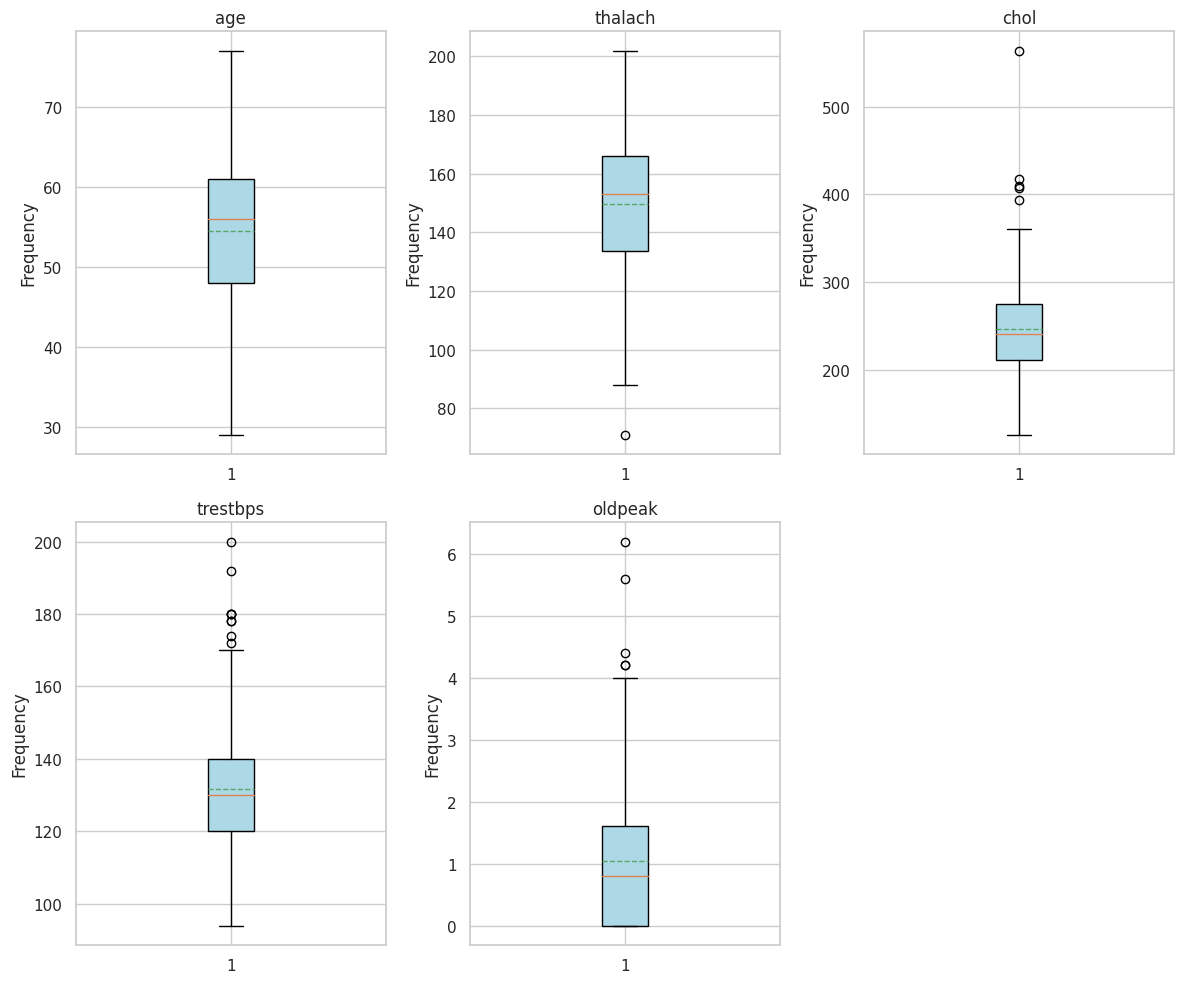

In [ ]:
def plot_boxplots(df, variables, figsize=(12, 10)):

    num_variables = len(variables)
    num_cols = 3
    num_rows = (num_variables - 1) // num_cols + 1

    plt.figure(figsize=figsize)

    sns.set(style="whitegrid")

    for i, var in enumerate(variables, 1):
        plt.subplot(num_rows, num_cols, i)
        plt.boxplot(x=df[var], showmeans=True, meanline=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        plt.title(var)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

variables_num = ['age','thalach', 'chol', 'trestbps', 'oldpeak']
plot_boxplots(df, variables_num)



###**Mapa de calor de correlación**

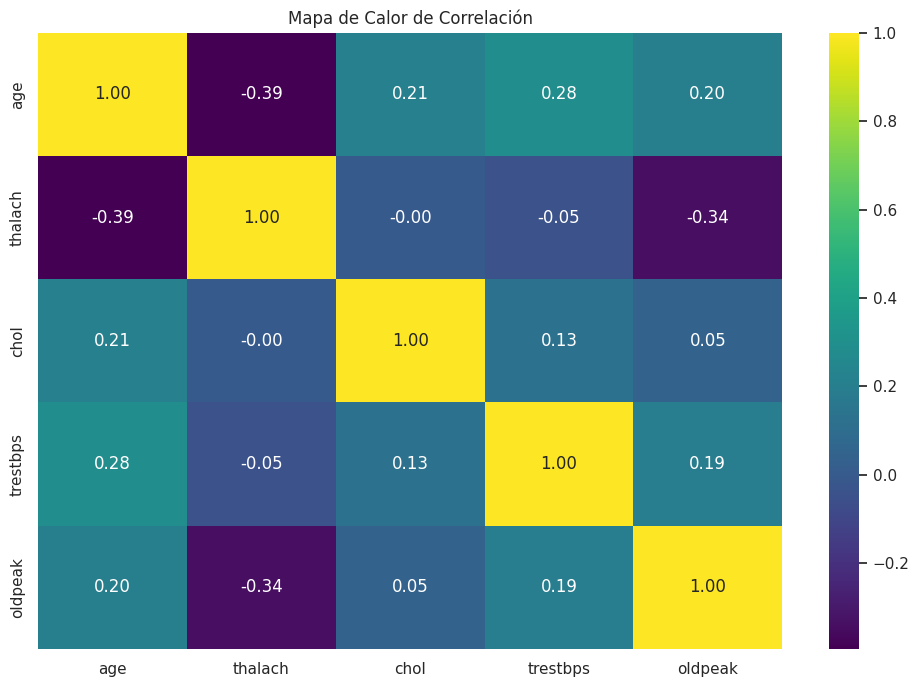

,age,thalach,chol,trestbps,oldpeak
age,1.000000,-0.393806,0.208950,0.284946,0.203805
thalach,-0.393806,1.000000,-0.003432,-0.045351,-0.343085
chol,0.208950,-0.003432,1.000000,0.130120,0.046564
trestbps,0.284946,-0.045351,0.130120,1.000000,0.189171
oldpeak,0.203805,-0.343085,0.046564,0.189171,1.000000


In [ ]:
# Mapa de Calor de Correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df[variables_num].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Mapa de Calor de Correlación")
plt.show()
display(pd.DataFrame(correlation_matrix))

* La edad (age) tiene una correlación positiva moderada con la presión sanguínea en reposo (trestbps) y el pico anterior al ejercicio (oldpeak).

* La frecuencia cardíaca máxima alcanzada durante el ejercicio (thalach) tiene una correlación negativa moderada con la edad y una correlación negativa fuerte con el pico anterior al ejercicio (oldpeak).

* El colesterol (chol) tiene una correlación positiva débil con la edad y una correlación débil con la presión sanguínea en reposo (trestbps).

Podemos ver que algunas de nuestras características tienen valores atípicos, estas características son:

**-trestbps**

**-oldpeak**

**-chol**

# Transformación de datos

## Codificación de variables catégoricas
Aplicamos one hot enconding

In [ ]:
variables_codificar = ['cp','restecg','slope','thal','num']

encoder = OneHotEncoder(sparse=False)

# Ajustar y transformar las columnas categóricas
encoded_data = encoder.fit_transform(df[variables_codificar])

# Crear un DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(variables_codificar))

# Concatenar el DataFrame original con el DataFrame codificado
final_df = pd.concat([df, encoded_df], axis=1)

#Eliminamos las columnas ya codificadas
final_df = final_df.drop(columns=variables_codificar)

## Escalamiento de variables númericas

In [ ]:
variables_continuas = ['age','trestbps','thalach','oldpeak','chol']

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta el scaler a las columnas seleccionadas y luego transforma las columnas
columnas_escaladas = scaler.fit_transform(final_df[variables_continuas])

# Reemplaza las columnas originales con las columnas escaladas
final_df[variables_continuas] = columnas_escaladas

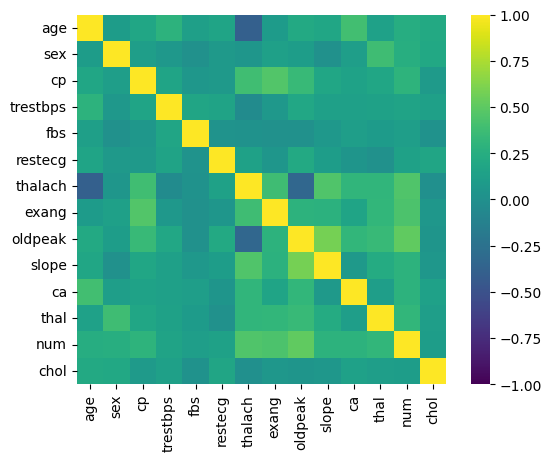

In [ ]:
variables_continuas = ['age','trestbps','thalach','oldpeak','chol']
variables_nominales = [col for col in df.columns if col not in variables_continuas]
result = associations(df, nominal_columns=variables_nominales,numerical_columns=variables_continuas, annot=False, cmap='viridis')

In [ ]:
final_df.to_csv('regresion_preprocesado.csv',index=False)